In [1]:
import lavavu
from lavavu.vutils import is_notebook
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer

In [2]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 14:32:07) \n[GCC 7.3.0]'

In [3]:
# log_to_console('info')
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.utils.helper import strike_dip_vector
import numpy as np
import pandas as pd
import logging
# logging.getLogger().setLevel(logging.INFO)

In [4]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = -11
boundary_points[0,1] = -11
boundary_points[0,2] = -6
boundary_points[1,0] = 11
boundary_points[1,1] = 11
boundary_points[1,2] = 2

In [5]:
strike_dip_vector([0.],[70.])[0].tolist()

[0.9396926207859084, -0.0, 0.3420201433256689]

In [6]:
data = pd.DataFrame(columns=['X','Y','Z','val','nx','ny','nz','feature_name'],dtype=np.float)
data.loc[len(data),['X','Y','Z','val','feature_name']] = [0.,-10.,-1.,0.,'f1']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [0.,-5.,-2.,0.,'f1']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [-5.,10.,0.,0.,'f1']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [-5.,5.,0.,0.,'f1']
v1 = strike_dip_vector([0.],[70.])[0]
v2 = strike_dip_vector([20.],[50.])[0]
v3 = strike_dip_vector([10.],[50.])[0]
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-10.,0.,v1[0],v1[1],v1[2],'f1']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-5.,0.,v1[0],v1[1],v1[2],'f1']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-9.,-4.,v1[0],v1[1],v1[2],'f1']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-6.,-2.,v1[0],v1[1],v1[2],'f1']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [-5.,10.,0.,v2[0],v2[1],v2[2],'f1']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [-5.,5.,0.,v3[0],v3[1],v3[2],'f1']

data.loc[len(data),['X','Y','Z','val','feature_name']] = [0.,-10.,-1.,0.,'f2']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [0.,-5.,-2.,0.,'f2']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [1.,10.,0.,0.,'f2']
data.loc[len(data),['X','Y','Z','val','feature_name']] = [1.,10.,0.,0.,'f2']

data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-10.,0.,v1[0],v1[1],v1[2],'f2']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-5.,0.,v1[0],v1[1],v1[2],'f2']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-9.,-4.,v1[0],v1[1],v1[2],'f2']
data.loc[len(data),['X','Y','Z','nx','ny','nz','feature_name']] = [0.,-6.,-2.,v1[0],v1[1],v1[2],'f2']


# surface_2_builder.add_point([0,-5,-2],0.)
# surface_2_builder.add_strike_and_dip([0,-10,0],0.,70.)
# surface_2_builder.add_strike_and_dip([0,-5,0],0.,70.)
# surface_2_builder.add_strike_and_dip([0,-9,-4],0.,70.)
# surface_2_builder.add_strike_and_dip([0,-6,-2],0.,70.)

# surface_2_builder.add_point([1,10,0],0)
# surface_2_builder.add_strike_and_dip([1,10,0],20.,50.)
# surface_2_builder.add_strike_and_dip([-1,5,0],10.,50.)
# surface_2_builder.add_point([-1,5,0],0)

In [7]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)
model.create_and_add_fault('f1',0,nelements=1e4,interpolatortype='FDI',solver='pyamg',regularisation=[0.2,0.2,0.2])
model.create_and_add_fault('f2',0,nelements=1e4,interpolatortype='FDI',solver='pyamg',regularisation=[0.2,0.2,0.2])


In [8]:
model2 = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model2.set_model_data(data)
splay_region = lambda pos : model2.rescale(pos)[:,1] < 0
model2.create_and_add_fault('f1',0,nelements=1e4,buffer=0.51,interpolatortype='FDI',solver='lu',damp=True,regularisation=[0.2,0.2,0.2])
model2.create_and_add_fault('f2',0,nelements=2e4,
                            splay=model2.features[0],
                            splayregion=splay_region,
                            interpolatortype='FDI',solver='lu',
#                            damp=True
                           )
model.update()

2021-03-24 11:58:53,207 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ No solution, f1_2 scalar field 0. Add more data.
2021-03-24 11:58:53,207 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ No solution, f1_2 scalar field 0. Add more data.
/home/lgrose/dev/python/LoopStructural/LoopStructural/modelling/features/geological_feature_builder.py:251: RuntimeWarning: invalid value encountered in true_divide
  vector /= np.linalg.norm(vector,axis=1)[:,None]
2021-03-24 11:58:53,608 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ No solution, f1_1 scalar field 0. Add more data.
2021-03-24 11:58:53,608 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ No solution, f1_1 scalar field 0. Add more data.


0it [00:00, ?it/s]


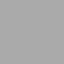

In [24]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(model2.features[0],isovalue=0,name='model2_f1',colour='blue')
viewer.add_isosurface(model2.features[1],isovalue=0,name='model2_f2')
viewer.add_data(model2.features[0][0])
# viewer.add_data(model.features[1][0])
# viewer.add_section(None,'y',(0-model2.origin[1])/model2.scale_factor)
viewer.interactive()

In [25]:
viewer.rotation

[-67.93016815185547, -9.925044059753418, -2.6390838623046875]

In [17]:
viewer.clear()

In [26]:
ims = []
viewer.border = 0
r1 = [-41.212615966796875, 2.1642980575561523, -8.277958869934082]
r2 = [-79.0985336303711, -14.917997360229492, -2.369173526763916]
viewer.add_isosurface(model2.features[0],isovalue=0,name='model2_f1',colour='blue')
viewer.add_isosurface(model2.features[1],isovalue=0,name='model2_f2')
viewer.rotation = [-67.93016815185547, -9.925044059753418, -2.6390838623046875]
ims.append(viewer.lv.rawimage().data)
viewer.rotation = [-67.93016815185547, -9.925044059753418, -2.6390838623046875]
ims.append(viewer.lv.rawimage().data)
viewer.clear()

viewer.add_isosurface(model.features[0],isovalue=0,name='model2_f1',colour='blue')
viewer.add_isosurface(model.features[1],isovalue=0,name='model2_f2')
viewer.rotation = [-67.93016815185547, -9.925044059753418, -2.6390838623046875]
ims.append(viewer.lv.rawimage().data)
viewer.rotation = [-67.93016815185547, -9.925044059753418, -2.6390838623046875]
ims.append(viewer.lv.rawimage().data)
viewer.clear()

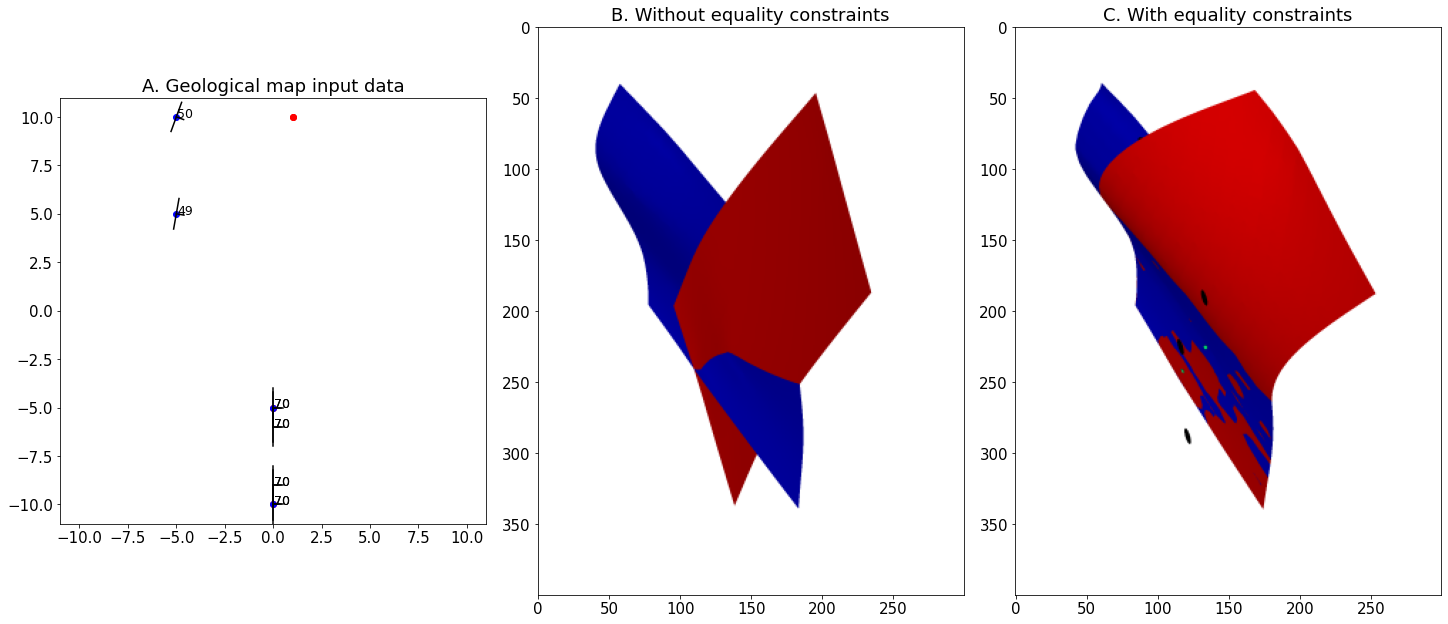

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 15
fig, ax = plt.subplots(1,3,figsize=(20,20),constrained_layout=True)

# ax[0][0].set_title('A.')
# ax[0][0].imshow(ims[2])
# ax[0][1].set_title('B.')
# ax[0][1].imshow(ims[3])
# ax[1][0].set_title('C.')
# ax[1][0].imshow(ims[0])
# ax[1][1].set_title('D.')
# ax[1][1].imshow(ims[1])
from LoopStructural.visualisation import MapView
mapview = MapView(model,ax=ax[0])
mapview.add_data(model.features[1][0],point_colour='red')
mapview.add_data(model.features[0][0],point_colour='blue',symb_scale=0.8)
# mapview.xmin= model.o-0.1
# mapview.xmax= 1.1
# mapview.ymin= -0.1
# mapview.ymax= 1.1


pts = [[model.origin[0],model.origin[1],model.origin[1],model.origin[0],model.origin[0]],
       [model.maximum[0],model.maximum[0],model.maximum[1],model.maximum[1],model.maximum[0]]]
ax[0].set_title('A. Geological map input data')
ax[0].plot(pts[0],pts[1],'k--')
ax[1].set_title('B. Without equality constraints')
ax[1].imshow(ims[3][50:450,200:500])
ax[2].set_title('C. With equality constraints')
ax[2].imshow(ims[1][50:450,200:500])

# fig.patch.set_visible(False)
# for i in range(3):
#     ax[i].axis(aspect='equal', adjustable='box-forced')

# plt.tight_layout()

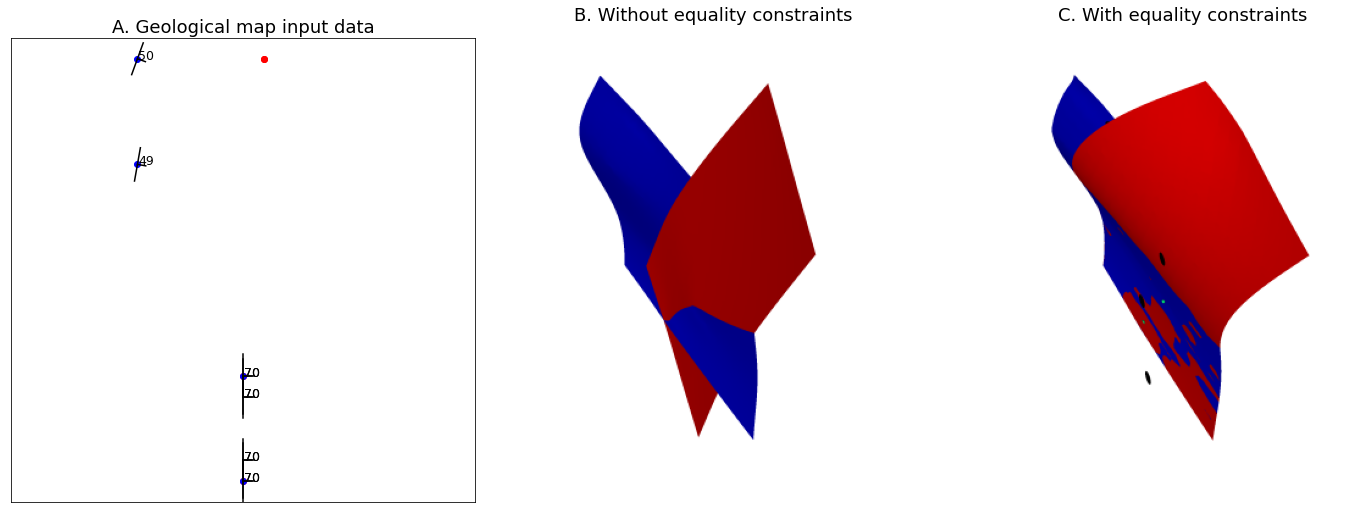

In [32]:
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams

rcParams['font.size'] = 15

fig  = plt.figure(figsize=(20,7.5))
gs = GridSpec(1, 3,)# width_ratios=[1,1.2,1.2],height_ratios=[1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
from LoopStructural.visualisation import MapView
mapview = MapView(model,ax=ax1)
mapview.add_data(model.features[1][0],point_colour='red')
mapview.add_data(model.features[0][0],point_colour='blue',symb_scale=0.8)
# mapview.xmin= -0.1
# mapview.xmax= 1.1
# mapview.ymin= -0.1
# mapview.ymax= 1.1



ax1.set_title('A. Geological map input data')
ax2.set_title('B. Without equality constraints')
ax2.imshow(ims[3][50:450,200:500])
ax3.set_title('C. With equality constraints')
ax3.imshow(ims[1][50:450,200:500])

ax2.axis('off')
ax3.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])
plt.tight_layout()